In [ ]:
# DON"T FORGET TO REMOVE HUMIDITY OVER 100
# And check against the example notebook

In [1]:
# Import dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import requests
import time
import scipy.stats as st
from scipy.stats import linregress


# Import keys
from config import w_api_key
from config import gkey

# Import citipy module
# Be sure to be in PythonData where this installed to have this work
from citipy import citipy

# Output file
output_data_file = "output_data/cities.csv"

# Set range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)


In [59]:
# List for holding lat_lngs and cities
coordinates = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1400)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1400)
coordinates = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for coord in coordinates:
    city = citipy.nearest_city(coord[0], coord[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

558

In [60]:
# cities

In [61]:
# Save config information
url = "http://api.openweathermap.org/data/2.5/weather?"
farenheit = "units=imperial" #imperial
city = cities[2]


# Build query URL
query_url = url + "appid=" + w_api_key + "&q=" + city + "&units=imperial"
# Hooray!  I'm talking to the data source and my call is working.

In [62]:
# Ok how am I getting information out of the json/results?
city_data_test = requests.get(query_url).json()
city_data_test

{'coord': {'lon': 20.0403, 'lat': -34.5322},
 'weather': [{'id': 800,
   'main': 'Clear',
   'description': 'clear sky',
   'icon': '01n'}],
 'base': 'stations',
 'main': {'temp': 62.6,
  'feels_like': 62.28,
  'temp_min': 62.6,
  'temp_max': 62.6,
  'pressure': 1016,
  'humidity': 88},
 'visibility': 10000,
 'wind': {'speed': 5.75, 'deg': 60},
 'clouds': {'all': 2},
 'dt': 1612819264,
 'sys': {'type': 1,
  'id': 1966,
  'country': 'ZA',
  'sunrise': 1612757249,
  'sunset': 1612806039},
 'timezone': 7200,
 'id': 1015776,
 'name': 'Bredasdorp',
 'cod': 200}

In [63]:
# Set up dataframe to hold data from Open Weather

weather_data = pd.DataFrame({
    "City": cities
})

# Add empty columns to fill
weather_data["Lat"] = ""
weather_data["Long"] = ""
weather_data["Max Temp"] = ""
weather_data["Humidity"] = ""
weather_data["Cloudiness"] = ""
weather_data["Wind Speed"] = ""
weather_data["Country"] = ""
weather_data["Date"] = ""

weather_data

,City,Lat,Long,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,punta arenas,,,,,,,,
1,illoqqortoormiut,,,,,,,,
2,bredasdorp,,,,,,,,
3,cidreira,,,,,,,,
4,nizhneyansk,,,,,,,,
...,...,...,...,...,...,...,...,...,...
553,kihei,,,,,,,,
554,constantine,,,,,,,,
555,bargal,,,,,,,,
556,sangar,,,,,,,,


In [64]:
# Set up a for loop to go through the weather_data dataframe
# to look for data for each city
# params = {degrees = farenheit}

base_url = url + "appid=" + w_api_key + "&units=imperial" + "&q=" 

for index, row in weather_data.iterrows():
    
    # Get the city name from the df
    name = row["City"]
    
    # Add city to url
    print(f"Retrieving data for {index}: {name}.")
    response = requests.get(base_url + name).json()
    
#     print(response)
    
    # Extract data
    results = response
#     print(results["coord"]["lat"])
    
    try:
#         print("Proof of entry into try block")
        weather_data.loc[index, "Lat"] = results["coord"]["lat"]
        weather_data.loc[index, "Long"] = results["coord"]["lon"]
        weather_data.loc[index, "Max Temp"] = results["main"]["temp_max"]
        weather_data.loc[index, "Humidity"] = results["main"]["humidity"]
        weather_data.loc[index, "Cloudiness"] = results["clouds"]["all"]
        weather_data.loc[index, "Wind Speed"] = results["wind"]["speed"]
        weather_data.loc[index, "Country"] = results["sys"]["country"]
        weather_data.loc[index, "Date"] = results["dt"]
        
        print(f"Retrieving results for {name}. Loading stats.")
        
    except KeyError:
        print(f"{name} not found.")
        weather_data.loc[index, "Lat"] = np.nan
        pass
    
    time.sleep(1)


Retrieving data for 0: punta arenas.
Retrieving results for punta arenas. Loading stats.
Retrieving data for 1: illoqqortoormiut.
illoqqortoormiut not found.
Retrieving data for 2: bredasdorp.
Retrieving results for bredasdorp. Loading stats.
Retrieving data for 3: cidreira.
Retrieving results for cidreira. Loading stats.
Retrieving data for 4: nizhneyansk.
nizhneyansk not found.
Retrieving data for 5: mataura.
Retrieving results for mataura. Loading stats.
Retrieving data for 6: ponta do sol.
Retrieving results for ponta do sol. Loading stats.
Retrieving data for 7: albany.
Retrieving results for albany. Loading stats.
Retrieving data for 8: umm ruwabah.
umm ruwabah not found.
Retrieving data for 9: kapaa.
Retrieving results for kapaa. Loading stats.
Retrieving data for 10: nouadhibou.
Retrieving results for nouadhibou. Loading stats.
Retrieving data for 11: rikitea.
Retrieving results for rikitea. Loading stats.
Retrieving data for 12: georgetown.
Retrieving results for georgetown. L

Retrieving data for 103: avarua.
Retrieving results for avarua. Loading stats.
Retrieving data for 104: vardo.
Retrieving results for vardo. Loading stats.
Retrieving data for 105: alice.
Retrieving results for alice. Loading stats.
Retrieving data for 106: hudson bay.
Retrieving results for hudson bay. Loading stats.
Retrieving data for 107: narsaq.
Retrieving results for narsaq. Loading stats.
Retrieving data for 108: faanui.
Retrieving results for faanui. Loading stats.
Retrieving data for 109: cherskiy.
Retrieving results for cherskiy. Loading stats.
Retrieving data for 110: sao filipe.
Retrieving results for sao filipe. Loading stats.
Retrieving data for 111: daru.
Retrieving results for daru. Loading stats.
Retrieving data for 112: mackay.
Retrieving results for mackay. Loading stats.
Retrieving data for 113: khatanga.
Retrieving results for khatanga. Loading stats.
Retrieving data for 114: bambous virieux.
Retrieving results for bambous virieux. Loading stats.
Retrieving data fo

Retrieving data for 204: qasigiannguit.
Retrieving results for qasigiannguit. Loading stats.
Retrieving data for 205: senador jose porfirio.
Retrieving results for senador jose porfirio. Loading stats.
Retrieving data for 206: mazurivka.
Retrieving results for mazurivka. Loading stats.
Retrieving data for 207: tessalit.
Retrieving results for tessalit. Loading stats.
Retrieving data for 208: kamaishi.
Retrieving results for kamaishi. Loading stats.
Retrieving data for 209: uwayl.
uwayl not found.
Retrieving data for 210: pandamatenga.
Retrieving results for pandamatenga. Loading stats.
Retrieving data for 211: cartagena.
Retrieving results for cartagena. Loading stats.
Retrieving data for 212: bathsheba.
Retrieving results for bathsheba. Loading stats.
Retrieving data for 213: nuuk.
Retrieving results for nuuk. Loading stats.
Retrieving data for 214: broken hill.
Retrieving results for broken hill. Loading stats.
Retrieving data for 215: mitha tiwana.
Retrieving results for mitha tiwan

Retrieving results for suntar. Loading stats.
Retrieving data for 305: fray bentos.
Retrieving results for fray bentos. Loading stats.
Retrieving data for 306: ormond beach.
Retrieving results for ormond beach. Loading stats.
Retrieving data for 307: krasnoselkup.
Retrieving results for krasnoselkup. Loading stats.
Retrieving data for 308: flin flon.
Retrieving results for flin flon. Loading stats.
Retrieving data for 309: moramanga.
Retrieving results for moramanga. Loading stats.
Retrieving data for 310: huilong.
Retrieving results for huilong. Loading stats.
Retrieving data for 311: namibe.
Retrieving results for namibe. Loading stats.
Retrieving data for 312: kuantan.
Retrieving results for kuantan. Loading stats.
Retrieving data for 313: taksimo.
Retrieving results for taksimo. Loading stats.
Retrieving data for 314: itarema.
Retrieving results for itarema. Loading stats.
Retrieving data for 315: inirida.
Retrieving results for inirida. Loading stats.
Retrieving data for 316: anto

Retrieving data for 405: pisco.
Retrieving results for pisco. Loading stats.
Retrieving data for 406: astana.
Retrieving results for astana. Loading stats.
Retrieving data for 407: muana.
Retrieving results for muana. Loading stats.
Retrieving data for 408: zetaquira.
Retrieving results for zetaquira. Loading stats.
Retrieving data for 409: tamalin.
Retrieving results for tamalin. Loading stats.
Retrieving data for 410: ostersund.
Retrieving results for ostersund. Loading stats.
Retrieving data for 411: phangnga.
Retrieving results for phangnga. Loading stats.
Retrieving data for 412: peterongan.
Retrieving results for peterongan. Loading stats.
Retrieving data for 413: turukhansk.
Retrieving results for turukhansk. Loading stats.
Retrieving data for 414: thinadhoo.
Retrieving results for thinadhoo. Loading stats.
Retrieving data for 415: jingdezhen.
Retrieving results for jingdezhen. Loading stats.
Retrieving data for 416: dawei.
Retrieving results for dawei. Loading stats.
Retrieving

Retrieving data for 507: rorvik.
Retrieving results for rorvik. Loading stats.
Retrieving data for 508: malanje.
Retrieving results for malanje. Loading stats.
Retrieving data for 509: arinos.
Retrieving results for arinos. Loading stats.
Retrieving data for 510: fevralsk.
fevralsk not found.
Retrieving data for 511: fort wellington.
Retrieving results for fort wellington. Loading stats.
Retrieving data for 512: novaya ladoga.
Retrieving results for novaya ladoga. Loading stats.
Retrieving data for 513: ulladulla.
Retrieving results for ulladulla. Loading stats.
Retrieving data for 514: duxbury.
Retrieving results for duxbury. Loading stats.
Retrieving data for 515: saint-augustin.
Retrieving results for saint-augustin. Loading stats.
Retrieving data for 516: bud.
Retrieving results for bud. Loading stats.
Retrieving data for 517: maraa.
Retrieving results for maraa. Loading stats.
Retrieving data for 518: atbasar.
Retrieving results for atbasar. Loading stats.
Retrieving data for 519:

In [65]:
weather_data.head(100)

,City,Lat,Long,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,punta arenas,-53.15,-70.9167,68,52,0,11.5,CL,1612819286
1,illoqqortoormiut,NaN,,,,,,,
2,bredasdorp,-34.5322,20.0403,62.6,88,5,5.75,ZA,1612819481
3,cidreira,-30.1811,-50.2056,74.77,71,0,12.21,BR,1612819184
4,nizhneyansk,NaN,,,,,,,
...,...,...,...,...,...,...,...,...,...
95,portobelo,9.55,-79.65,88,66,93,5.99,PA,1612819584
96,east london,-33.0153,27.9116,70.02,76,21,6.13,ZA,1612819585
97,husavik,66.0449,-17.3389,30.2,80,75,4.61,IS,1612819586
98,arraial do cabo,-22.9661,-42.0278,73.4,88,75,4.61,BR,1612819262


In [66]:
weather_data.dropna(inplace=True)
weather_data.reset_index(drop=True, inplace=True)
weather_data

,City,Lat,Long,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,punta arenas,-53.15,-70.9167,68,52,0,11.5,CL,1612819286
1,bredasdorp,-34.5322,20.0403,62.6,88,5,5.75,ZA,1612819481
2,cidreira,-30.1811,-50.2056,74.77,71,0,12.21,BR,1612819184
3,mataura,-46.1927,168.864,60.39,85,100,2.33,NZ,1612819485
4,ponta do sol,32.6667,-17.1,57.99,69,24,3,PT,1612819390
...,...,...,...,...,...,...,...,...,...
505,camalu,30.85,-116.067,64,43,0,5.99,MX,1612820091
506,praia da vitoria,38.7333,-27.0667,60.8,77,40,13,PT,1612819766
507,kihei,20.785,-156.466,77,61,40,19.57,US,1612820093
508,constantine,36.365,6.6147,50,76,75,20.71,DZ,1612820094


In [79]:
# Export weather_data to csv
# Update with full data set later (updated)

weather_data.to_csv("City_Weather_data.csv", index=False)

weather_data_2 = pd.read_csv("Working_data.csv")
weather_data_2

,City,Lat,Long,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,punta arenas,-53.1500,-70.9167,68.00,52,0,11.50,CL,1612819286
1,bredasdorp,-34.5322,20.0403,62.60,88,5,5.75,ZA,1612819481
2,cidreira,-30.1811,-50.2056,74.77,71,0,12.21,BR,1612819184
3,mataura,-46.1927,168.8643,60.39,85,100,2.33,NZ,1612819485
4,ponta do sol,32.6667,-17.1000,57.99,69,24,3.00,PT,1612819390
...,...,...,...,...,...,...,...,...,...
505,camalu,30.8500,-116.0667,64.00,43,0,5.99,MX,1612820091
506,praia da vitoria,38.7333,-27.0667,60.80,77,40,13.00,PT,1612819766
507,kihei,20.7850,-156.4656,77.00,61,40,19.57,US,1612820093
508,constantine,36.3650,6.6147,50.00,76,75,20.71,DZ,1612820094


In [80]:
# Make a heck ton of scatter plots

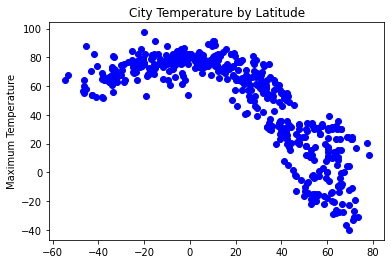

In [81]:
# Temp vs Latitude
x = weather_data["Lat"]
temp_y = weather_data["Max Temp"]

plt.plot(x, temp_y, "bo")

plt.ylabel("Maximum Temperature")
plt.title("City Temperature by Latitude")

plt.show()

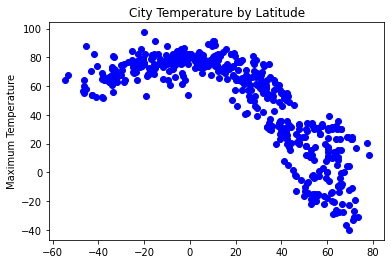

In [82]:
# Temperature vs Latitude
x = weather_data["Lat"]
temp_y = weather_data["Max Temp"]

plt.plot (x, temp_y, "bo")
plt.ylabel("Maximum Temperature")
plt.title("City Temperature by Latitude")
plt.show()

# Why won't my plt.xlabel work????

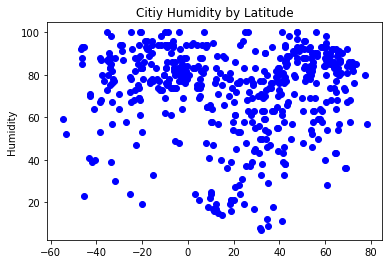

In [83]:
# Humidity vs Latitude
humid_y = weather_data["Humidity"]

plt.plot(x, humid_y, "bo")
plt.ylabel("Humidity")
# plt.xlabel("Latitude")
plt.title("Citiy Humidity by Latitude")
plt.show()

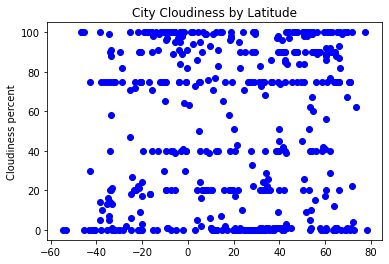

In [84]:
# Cloudiness vs Latitude
cloud_y = weather_data["Cloudiness"]

plt.plot(x, cloud_y, "bo")
plt.ylabel("Cloudiness percent")
plt.title("City Cloudiness by Latitude")
plt.show()

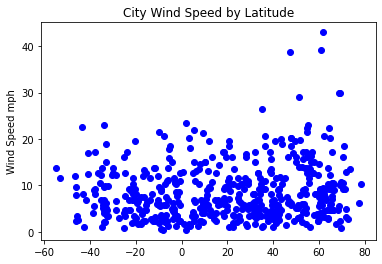

In [85]:
# Wind Speed by Latitude
wind_y = weather_data["Wind Speed"]

plt.plot(x, wind_y, "bo")
plt.ylabel("Wind Speed mph")
plt.title("City Wind Speed by Latitude")
plt.show()

In [86]:
# Separate df by hemispheres
northern_weather = weather_data_2.loc[weather_data["Lat"] >= 0]
northern_weather

southern_weather = weather_data_2.loc[weather_data["Lat"] <= 0]
southern_weather

,City,Lat,Long,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,punta arenas,-53.1500,-70.9167,68.00,52,0,11.50,CL,1612819286
1,bredasdorp,-34.5322,20.0403,62.60,88,5,5.75,ZA,1612819481
2,cidreira,-30.1811,-50.2056,74.77,71,0,12.21,BR,1612819184
3,mataura,-46.1927,168.8643,60.39,85,100,2.33,NZ,1612819485
8,rikitea,-23.1203,-134.9692,77.13,73,20,9.22,PF,1612819358
...,...,...,...,...,...,...,...,...,...
494,alyangula,-13.8483,136.4192,82.40,83,100,6.91,AU,1612819796
495,puerto narino,-3.7703,-70.3831,77.00,100,75,2.77,CO,1612819813
497,mlonggo,-6.5333,110.7000,75.20,94,40,2.30,ID,1612820081
498,mahebourg,-20.4081,57.7000,78.80,83,75,6.91,MU,1612820082


## Southern Hemisphere Regressions

The correlation between latitude and temperature in the Southern Hemisphere is 0.55


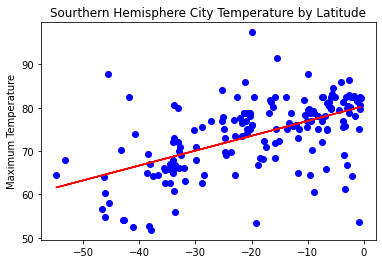

In [87]:
# Let's start with the Southern Hemisphere 

# Southern Temp vs Latitude
south_x = southern_weather["Lat"]
south_temp = southern_weather["Max Temp"]

plt.plot (south_x, south_temp, "bo")

# Calculate the line of best fit and plot on the graph
(slope, intercept, rvalue, pvalue, stderr) = linregress(south_x, south_temp)
regress_values = south_x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Place the line on the graph and annotate
correlation = st.pearsonr(south_x, south_temp)
# Why is this showing so weirdly?
print(f"The correlation between latitude and temperature in the Southern Hemisphere is {round(correlation[0],2)}")

plt.plot(south_x, regress_values, "r-")
# plt.annotate(line_eq,(-40,285),fontsize=15,color="green")

plt.ylabel("Maximum Temperature")
# plt.xlabel("Latitude")
plt.title("Sourthern Hemisphere City Temperature by Latitude")

plt.show()

The correlation between latitude and humidity in the Southern Hemisphere is 0.23


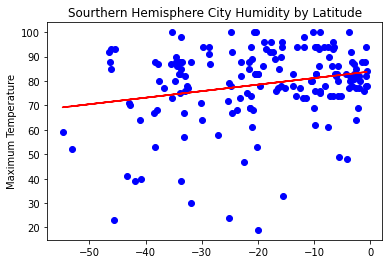

In [88]:
# Southern Humidity vs Latitude
south_x = southern_weather["Lat"]
south_humid = southern_weather["Humidity"]

plt.plot (south_x, south_humid, "bo")

# Calculate the line of best fit and plot on the graph
(slope, intercept, rvalue, pvalue, stderr) = linregress(south_x, south_humid)
regress_values = south_x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Place the line on the graph and annotate
correlation = st.pearsonr(south_x, south_humid)
# Why is this showing so weirdly?
print(f"The correlation between latitude and humidity in the Southern Hemisphere is {round(correlation[0],2)}")

plt.plot(south_x, regress_values, "r-")
# plt.annotate(line_eq,(-40,285),fontsize=15,color="green")

plt.ylabel("Maximum Temperature")
# plt.xlabel("Latitude")
plt.title("Sourthern Hemisphere City Humidity by Latitude")

plt.show()

The correlation between latitude and cloudiness in the Southern Hemisphere is 0.35


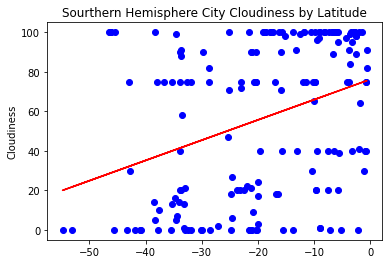

In [89]:
# Southern cloudiness vs Latitude
south_x = southern_weather["Lat"]
south_cloud = southern_weather["Cloudiness"]

plt.plot (south_x, south_cloud, "bo")

# Calculate the line of best fit and plot on the graph
(slope, intercept, rvalue, pvalue, stderr) = linregress(south_x, south_cloud)
regress_values = south_x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Place the line on the graph and annotate
correlation = st.pearsonr(south_x, south_cloud)
# Why is this showing so weirdly?
print(f"The correlation between latitude and cloudiness in the Southern Hemisphere is {round(correlation[0],2)}")

plt.plot(south_x, regress_values, "r-")
# plt.annotate(line_eq,(-40,285),fontsize=15,color="green")

plt.ylabel("Cloudiness")
# plt.xlabel("Latitude")
plt.title("Sourthern Hemisphere City Cloudiness by Latitude")

plt.show()

The correlation between latitude and wind speed in the Southern Hemisphere is -0.15


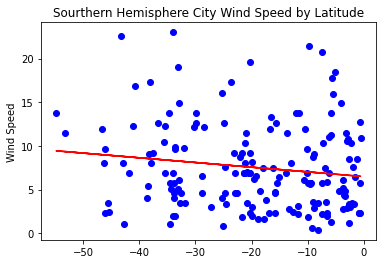

In [90]:
# Southern Wind Speed vs Latitude
south_x = southern_weather["Lat"]
south_wind = southern_weather["Wind Speed"]

plt.plot (south_x, south_wind, "bo")

# Calculate the line of best fit and plot on the graph
(slope, intercept, rvalue, pvalue, stderr) = linregress(south_x, south_wind)
regress_values = south_x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Place the line on the graph and annotate
correlation = st.pearsonr(south_x, south_wind)
# Why is this showing so weirdly?
print(f"The correlation between latitude and wind speed in the Southern Hemisphere is {round(correlation[0],2)}")

plt.plot(south_x, regress_values, "r-")
# plt.annotate(line_eq,(-40,285),fontsize=15,color="green")

plt.ylabel("Wind Speed")
# plt.xlabel("Latitude")
plt.title("Sourthern Hemisphere City Wind Speed by Latitude")

plt.show()

## Northern Hemispere Regressions

The correlation between latitude and temperature in the Northern Hemisphere is -0.87


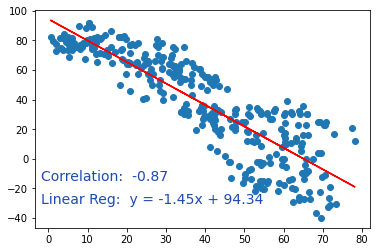

In [91]:
# Northern Temp vs Latitude
north_x = northern_weather["Lat"]
north_temp = northern_weather["Max Temp"]

correlation = st.pearsonr(north_x, north_temp)
print(f"The correlation between latitude and temperature in the Northern Hemisphere is {round(correlation[0],2)}")

# Calculate the line of best fit and plot on the graph
(slope, intercept, rvalue, pvalue, stderr) = linregress(north_x, north_temp)
regress_values = north_x * slope + intercept
line_eq = f'y = {str(round(slope,2))}x + {str(round(intercept,2))}'
plt.scatter(north_x, north_temp)
plt.plot(north_x, regress_values, "r-")
plt.annotate(f'Correlation:  {round(rvalue, 2)}', (-2,-15), fontsize=14, color='#1e4bae')
plt.annotate(f'Linear Reg:  {line_eq}', (-2,-30), fontsize=14, color='#1e4bae')

plt.show()

The correlation between latitude and humidity in the Northern Hemisphere is 0.28


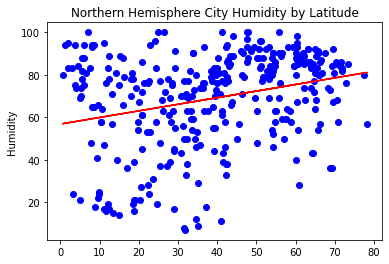

In [92]:
# Northern Humidity vs Latitude
north_x = northern_weather["Lat"]
north_humid = northern_weather["Humidity"]

plt.plot (north_x, north_humid, "bo")

# Calculate the line of best fit and plot on the graph
(slope, intercept, rvalue, pvalue, stderr) = linregress(north_x, north_humid)
regress_values = north_x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Place the line on the graph and annotate
correlation = st.pearsonr(north_x, north_humid)
# Why is this showing so weirdly?
print(f"The correlation between latitude and humidity in the Northern Hemisphere is {round(correlation[0],2)}")

plt.plot(north_x, regress_values, "r-")
# plt.annotate(line_eq,(-40,285),fontsize=15,color="green")

plt.ylabel("Humidity")
# plt.xlabel("Latitude")
plt.title("Northern Hemisphere City Humidity by Latitude")

plt.show()

The correlation between latitude and cloudiness in the Northern Hemisphere is 0.15


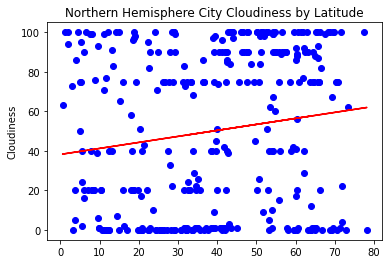

In [93]:
# Northern Cloudiness vs Latitude
north_x = northern_weather["Lat"]
north_cloud = northern_weather["Cloudiness"]

plt.plot (north_x, north_cloud, "bo")

# Calculate the line of best fit and plot on the graph
(slope, intercept, rvalue, pvalue, stderr) = linregress(north_x, north_cloud)
regress_values = north_x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Place the line on the graph and annotate
correlation = st.pearsonr(north_x, north_cloud)
# Why is this showing so weirdly?
print(f"The correlation between latitude and cloudiness in the Northern Hemisphere is {round(correlation[0],2)}")

plt.plot(north_x, regress_values, "r-")
# plt.annotate(line_eq,(-40,285),fontsize=15,color="green")

plt.ylabel("Cloudiness")
# plt.xlabel("Latitude")
plt.title("Northern Hemisphere City Cloudiness by Latitude")

plt.show()

The correlation between latitude and wind speed in the Northern Hemisphere is 0.12


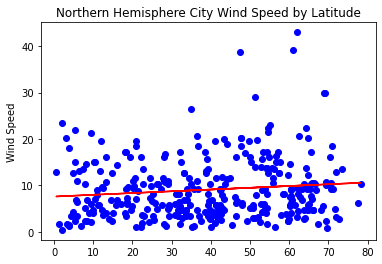

In [94]:
# Northern Wind Speed vs Latitude
north_x = northern_weather["Lat"]
north_wind = northern_weather["Wind Speed"]

plt.plot (north_x, north_wind, "bo")

# Calculate the line of best fit and plot on the graph
(slope, intercept, rvalue, pvalue, stderr) = linregress(north_x, north_wind)
regress_values = north_x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Place the line on the graph and annotate
correlation = st.pearsonr(north_x, north_wind)
# Why is this showing so weirdly?
print(f"The correlation between latitude and wind speed in the Northern Hemisphere is {round(correlation[0],2)}")

plt.plot(north_x, regress_values, "r-")
# plt.annotate(line_eq,(-40,285),fontsize=15,color="green")

plt.ylabel("Wind Speed")
# plt.xlabel("Latitude")
plt.title("Northern Hemisphere City Wind Speed by Latitude")

plt.show()

In [95]:
# Be sure to go back and fix the xlabel issue and add a line analyzing each chart

The correlation between latitude and temperature in the Southern Hemisphere is 0.55


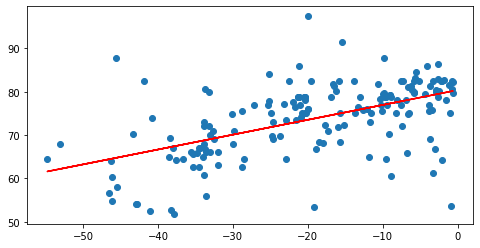

In [96]:
# Extra stuff?



correlation = st.pearsonr(south_x, south_temp)
# Why is this showing so weirdly?
print(f"The correlation between latitude and temperature in the Southern Hemisphere is {round(correlation[0],2)}")

# Calculate the line of best fit and plot on the graph
(slope, intercept, rvalue, pvalue, stderr) = linregress(south_x, south_temp)
regress_values = south_x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.figure(figsize=(8, 4))
plt.scatter(south_x, south_temp)
plt.plot(south_x, regress_values, "r-")
# plt.annotate(line_eq,(-40,285),fontsize=15,color="green")
# The above annotation was making the weird